### Imports

In [1386]:
from random import choice
from random import random
import matplotlib.pyplot as plt

### Booleanization of multi-valued properties 
![Boolianzied](booleanizedTable.png)

#### Advantages of Boolean features
- **Boolean algebra** is the same as propositional logic, which models logical reasoning with True and False statements.
- You can use **Boolean algebra** – the language of computers – to build patterns.
- Boolean features fit well with a computer because you can store them individually as bits.


In [1387]:
# Recurrent and non-recurrent patients
patients = [
    {'Menopause ge40': True, 'Inv-nodes 3-5': True, 'Deg-malign 3': True},
    {'Menopause lt40': True, 'Inv-nodes 0-2': True, 'Deg-malign 3': True},
    {'Menopause ge40': True, 'Inv-nodes 6-8': True, 'Deg-malign 3': True},
    {'Menopause ge40': True, 'Inv-nodes 0-2': True, 'Deg-malign 2': True},
    {'Menopause premeno': True, 'Inv-nodes 0-2': True, 'Deg-malign 3': True},
    {'Menopause premeno':True , 'Inv-nodes 0-2': True, 'Deg-malign 1': True}
]

# Additional patients
patients1 = [
    {'Menopause ge40': True, 'Inv-nodes 3-5': True, 'Deg-malign 3': True},
    {'Menopause lt40': True, 'Inv-nodes 0-2': True, 'Deg-malign 3': True},
    {'Menopause ge40': True, 'Inv-nodes 6-8': True, 'Deg-malign 3': True},
    {'Menopause ge40': True, 'Inv-nodes 0-2': True, 'Deg-malign 2': True},
    {'Menopause premeno': True, 'Inv-nodes 0-2': True, 'Deg-malign 3': True},
    {'Menopause premeno': True, 'Inv-nodes 0-2': True, 'Deg-malign 1': True},

    {'Menopause ge40': True, 'Inv-nodes 6-8': True, 'Deg-malign 3': True},
    {'Menopause lt40': True, 'Inv-nodes 3-5': True, 'Deg-malign 2': True},
    {'Menopause premeno': True, 'Inv-nodes 6-8': True, 'Deg-malign 2': True},
    {'Menopause ge40': True, 'Inv-nodes 0-2': True, 'Deg-malign 3': True},
    {'Menopause lt40': True, 'Inv-nodes 3-5': True, 'Deg-malign 1': True},
    {'Menopause premeno': True, 'Inv-nodes 0-2': True, 'Deg-malign 2': True}
]

# Rule for recurrent patient - Not used for i and ii
Rules = [{'Deg-malign 3', 'NOT Menopause lt40'},
         {'Deg-malign 3'},
         {'NOT Inv-nodes 0-2'}]


### Evaluation of features based on rules

In [1388]:
def evaluate_condition(observation, condition):
    truth_value_of_condition = True
    for feature in observation:
        if feature in condition and observation[feature] == False:
            truth_value_of_condition = False
            break
        if 'NOT ' + feature in condition and observation[feature] == True:
            truth_value_of_condition = False
            break
    return truth_value_of_condition


### Memory system
![rule_memory_example](rule_memory_example.png)

#### Key points of a memory system
- A way for the tsetlin machine to remember important features



In [1389]:
class Memory:
    def __init__(self, forget_value, memorize_value, memory):
        self.memory = memory
        self.forget_value = forget_value
        self.memorize_value = memorize_value
        self.memoryAmount = 10
        self.memoryLine = (self.memoryAmount / 2) + 1

    def get_memory(self):
        return self.memory

    def get_literals(self):
        return list(self.memory.keys())

    def get_condition(self):
        condition = []
        for literal in self.memory:
            if self.memory[literal] >= self.memoryLine:
                condition.append(literal)
        return condition

    def memorize(self, literal):
        if random() <= self.memorize_value and self.memory[literal] < self.memoryAmount:
            self.memory[literal] += 1

    def forget(self, literal):
        if random() <= self.forget_value and self.memory[literal] > 1:
            self.memory[literal] -= 1

    def memorize_always(self, literal):
        if  self.memory[literal] < self.memoryAmount:
            self.memory[literal] += 1

### Type i and ii feedback

#### Type i feedback
The type_i_feedback() method produces frequent patterns with two learning steps:
- Check if the condition part of the rule is True by assessing the object's literals. If the condition part is True, then memorize all the literals that are True for the object.
- Forget all remaining literals.

#### Type ii feedback
The type_ii_feedback() method implements the third and final learning step:

- Check if the condition part of the rule is True by assessing the object’s literals. If the condition part is True, then memorize all Forgotten literals that are False for the object. This time there is no randomization – the increment is always performed.

In [1390]:
def type_i_feedback(observation, memory):
    remaining_literals = memory.get_literals()
    #print(remaining_literals)
    if evaluate_condition(observation, memory.get_condition()):
        for feature in observation:
            #print('Feature: ' + feature)
            if observation[feature]:
                memory.memorize(feature)
                remaining_literals.remove(feature)
            elif not observation[feature]:
                memory.memorize('NOT ' + feature)
                remaining_literals.remove('NOT ' + feature)
    for literal in remaining_literals:
        #print('Remaining Literal:' + literal)
        memory.forget(literal)
        
def type_ii_feedback(observation, memory):
    if evaluate_condition(observation, memory.get_condition()):
        for feature in observation:
            if not observation[feature]:
                memory.memorize_always(feature)
            elif observation[feature]:
                memory.memorize_always('NOT ' + feature)

### Generating features

This function creates the different features the patients can have including 'NOT' features. This will then be used for the creating of Recurrence and NonRecurrence Rules

In [1391]:
def GenerateRules():
    StartingMemory = 5
    RecurrenceConditions = {}
    
    # Design-malign rules
    for i in range(3):
        RecurrenceConditions[f'Deg-malign {str(i+1)}'] = StartingMemory
    for i in range(3):
        RecurrenceConditions[f'NOT Deg-malign {str(i+1)}'] = StartingMemory

    # Menopause
    Menopause = ['ge40', 'lt40', 'premeno']
    for menop in Menopause:
        RecurrenceConditions[f'Menopause {menop}'] = StartingMemory
    for menop in Menopause:
        RecurrenceConditions[f'NOT Menopause {menop}'] = StartingMemory

    # Inv-nodes
    InvNodes = ['0-2', '3-5', '6-8']
    for invnode in InvNodes:
        RecurrenceConditions[f'Inv-nodes {invnode}'] = StartingMemory
    for invnode in InvNodes:
        RecurrenceConditions[f'NOT Inv-nodes {invnode}'] = StartingMemory
    
    return RecurrenceConditions

GenerateRules()

{'Deg-malign 1': 5,
 'Deg-malign 2': 5,
 'Deg-malign 3': 5,
 'NOT Deg-malign 1': 5,
 'NOT Deg-malign 2': 5,
 'NOT Deg-malign 3': 5,
 'Menopause ge40': 5,
 'Menopause lt40': 5,
 'Menopause premeno': 5,
 'NOT Menopause ge40': 5,
 'NOT Menopause lt40': 5,
 'NOT Menopause premeno': 5,
 'Inv-nodes 0-2': 5,
 'Inv-nodes 3-5': 5,
 'Inv-nodes 6-8': 5,
 'NOT Inv-nodes 0-2': 5,
 'NOT Inv-nodes 3-5': 5,
 'NOT Inv-nodes 6-8': 5}

### Classifying the patients and separating them to recurrent and non-recurrent groups

Recurrence
Non-Recurrence
Recurrence
Non-Recurrence
Recurrence
Non-Recurrence
##############################   RECURRENT PATIENTS    ############################################
[{'Menopause ge40': True, 'Inv-nodes 3-5': True, 'Deg-malign 3': True}, {'Menopause ge40': True, 'Inv-nodes 6-8': True, 'Deg-malign 3': True}, {'Menopause premeno': True, 'Inv-nodes 0-2': True, 'Deg-malign 3': True}]
#############################   NON-RECURRENT PATIENTS   ##########################################
[{'Menopause lt40': True, 'Inv-nodes 0-2': True, 'Deg-malign 3': True}, {'Menopause ge40': True, 'Inv-nodes 0-2': True, 'Deg-malign 2': True}, {'Menopause premeno': True, 'Inv-nodes 0-2': True, 'Deg-malign 1': True}]


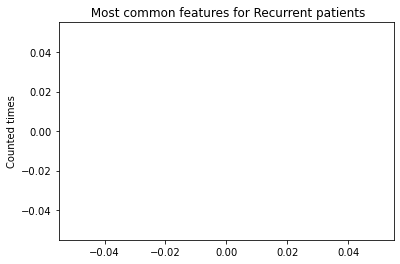

NameError: name 'tsetlin' is not defined

In [1392]:
ReccurentPatients = []
NonReccurentPatients = []

def ManuallyClassify(observation, rules):
    votes = 0
    for feature in observation:
        for rule in rules:
            if feature in rule and observation[feature] == True:
                votes += 1
            if 'NOT ' + feature in rule and observation[feature] == True:
                votes -= 1
    if votes > 0:
        ReccurentPatients.append(observation)
        return "Recurrence"
    if votes <= 0:
        NonReccurentPatients.append(observation)
        return "Non-Recurrence"

for patient in patients:
    print(ManuallyClassify(patient, Rules))

print('##############################   RECURRENT PATIENTS    ############################################')    
print(ReccurentPatients)
print('#############################   NON-RECURRENT PATIENTS   ##########################################')    
print(NonReccurentPatients)

### Learning recurrence rule (forget: 0.8, memorize: 0.2)

In [1468]:
RecurrenceRule = Memory(0.8,0.2,GenerateRules())
for i in range(10000):
    observation_id = choice([0, 1, 2])
    patient = choice([0,1])
    if patient == 1:
        type_i_feedback(ReccurentPatients[observation_id], RecurrenceRule)
    else:
        type_ii_feedback(NonReccurentPatients[observation_id], RecurrenceRule)

print('#############################   GET MEMORY   ##########################################')     
print(RecurrenceRule.get_memory())
print('############################  GET CONDITION  ##########################################')
print(RecurrenceRule.get_condition())

#############################   GET MEMORY   ##########################################
{'Deg-malign 1': 1, 'Deg-malign 2': 1, 'Deg-malign 3': 10, 'NOT Deg-malign 1': 3, 'NOT Deg-malign 2': 2, 'NOT Deg-malign 3': 1, 'Menopause ge40': 4, 'Menopause lt40': 1, 'Menopause premeno': 1, 'NOT Menopause ge40': 1, 'NOT Menopause lt40': 1, 'NOT Menopause premeno': 2, 'Inv-nodes 0-2': 1, 'Inv-nodes 3-5': 1, 'Inv-nodes 6-8': 3, 'NOT Inv-nodes 0-2': 5, 'NOT Inv-nodes 3-5': 1, 'NOT Inv-nodes 6-8': 1}
############################  GET CONDITION  ##########################################
['Deg-malign 3']


### Learning non-recurrence rule (forget: 0.8, memorize: 0.2)

In [1531]:
NonRecurrenceRule = Memory(0.8, 0.2, GenerateRules())
for i in range(10000):
    observation_id = choice([0, 1, 2])
    patient = choice([0, 1])
    if patient == 1:
        type_i_feedback(NonReccurentPatients[observation_id], NonRecurrenceRule)
    else:
        type_ii_feedback(ReccurentPatients[observation_id], NonRecurrenceRule)

print('#############################   GET MEMORY   ##########################################')
print(NonRecurrenceRule.get_memory())
print('############################  GET CONDITION  ##########################################')
print(NonRecurrenceRule.get_condition())

#############################   GET MEMORY   ##########################################
{'Deg-malign 1': 1, 'Deg-malign 2': 1, 'Deg-malign 3': 2, 'NOT Deg-malign 1': 1, 'NOT Deg-malign 2': 1, 'NOT Deg-malign 3': 6, 'Menopause ge40': 1, 'Menopause lt40': 1, 'Menopause premeno': 1, 'NOT Menopause ge40': 3, 'NOT Menopause lt40': 1, 'NOT Menopause premeno': 1, 'Inv-nodes 0-2': 7, 'Inv-nodes 3-5': 1, 'Inv-nodes 6-8': 1, 'NOT Inv-nodes 0-2': 1, 'NOT Inv-nodes 3-5': 3, 'NOT Inv-nodes 6-8': 1}
############################  GET CONDITION  ##########################################
['NOT Deg-malign 3', 'Inv-nodes 0-2']


### Classify patients using the new conditions set by i and ii

In [1476]:
def classify(observation, RecurrenceRules, NonRecurrenceRules):
    vote_sum = 0
    for RecurrenceRule in RecurrenceRules:
        if evaluate_condition(observation, RecurrenceRule.get_condition()):
            vote_sum += 1
    for NonRecurrenceRule in NonRecurrenceRules:
        if evaluate_condition(observation, NonRecurrenceRule.get_condition()):
            vote_sum -= 1
    if vote_sum > 0:
        return "Recurrence"
    if vote_sum <= 0:
        return "Non-Recurrence"
    
for patient in patients:
    print(classify(patient, [RecurrenceRule], [NonRecurrenceRule]))

Recurrence
Recurrence
Recurrence
Non-Recurrence
Recurrence
Non-Recurrence


### Task 7
Repeat 5. and 6. with forget value 0.5 and memorize value 0.5

In [1603]:
RecurrenceRule = Memory(0.5,0.5,GenerateRules())
for i in range(10000):
    observation_id = choice([0, 1, 2])
    patient = choice([0,1])
    if patient == 1:
        type_i_feedback(ReccurentPatients[observation_id], RecurrenceRule)
    else:
        type_ii_feedback(NonReccurentPatients[observation_id], RecurrenceRule)

print('#############################   GET MEMORY   ##########################################')     
print(RecurrenceRule.get_memory())
print('############################  GET CONDITION  ##########################################')
print(RecurrenceRule.get_condition())
print()

NonRecurrenceRule = Memory(0.5, 0.5, GenerateRules())
for i in range(10000):
    observation_id = choice([0, 1, 2])
    patient = choice([0, 1])
    if patient == 1:
        type_i_feedback(NonReccurentPatients[observation_id], NonRecurrenceRule)
    else:
        type_ii_feedback(ReccurentPatients[observation_id], NonRecurrenceRule)

print('#############################   GET MEMORY   ##########################################')
print(NonRecurrenceRule.get_memory())
print('############################  GET CONDITION  ##########################################')
print(NonRecurrenceRule.get_condition())
print()

def classify(observation, RecurrenceRules, NonRecurrenceRules):
    vote_sum = 0
    for RecurrenceRule in RecurrenceRules:
        if evaluate_condition(observation, RecurrenceRule.get_condition()):
            vote_sum += 1
    for NonRecurrenceRule in NonRecurrenceRules:
        if evaluate_condition(observation, NonRecurrenceRule.get_condition()):
            vote_sum -= 1
    if vote_sum > 0:
        return "Recurrence"
    if vote_sum <= 0:
        return "Non-Recurrence"

print('################ Classification run ##################')
for patient in patients:
    print(classify(patient, [RecurrenceRule], [NonRecurrenceRule]))

#############################   GET MEMORY   ##########################################
{'Deg-malign 1': 1, 'Deg-malign 2': 1, 'Deg-malign 3': 10, 'NOT Deg-malign 1': 1, 'NOT Deg-malign 2': 2, 'NOT Deg-malign 3': 2, 'Menopause ge40': 9, 'Menopause lt40': 1, 'Menopause premeno': 1, 'NOT Menopause ge40': 1, 'NOT Menopause lt40': 3, 'NOT Menopause premeno': 1, 'Inv-nodes 0-2': 1, 'Inv-nodes 3-5': 1, 'Inv-nodes 6-8': 5, 'NOT Inv-nodes 0-2': 6, 'NOT Inv-nodes 3-5': 1, 'NOT Inv-nodes 6-8': 1}
############################  GET CONDITION  ##########################################
['Deg-malign 3', 'Menopause ge40', 'NOT Inv-nodes 0-2']

#############################   GET MEMORY   ##########################################
{'Deg-malign 1': 1, 'Deg-malign 2': 3, 'Deg-malign 3': 2, 'NOT Deg-malign 1': 1, 'NOT Deg-malign 2': 1, 'NOT Deg-malign 3': 3, 'Menopause ge40': 3, 'Menopause lt40': 1, 'Menopause premeno': 1, 'NOT Menopause ge40': 2, 'NOT Menopause lt40': 1, 'NOT Menopause premeno': 2, 'Inv

### Task 8
Repeat 5. and 6. with forget value 0.2 and memorize value 0.8

In [1655]:
RecurrenceRule = Memory(0.2,0.8,GenerateRules())
for i in range(10000):
    observation_id = choice([0, 1, 2])
    patient = choice([0, 1])
    if patient == 1:
        type_i_feedback(ReccurentPatients[observation_id], RecurrenceRule)
    else:
        type_ii_feedback(NonReccurentPatients[observation_id], RecurrenceRule)

print('#############################   GET MEMORY   ##########################################')
print(RecurrenceRule.get_memory())
print('############################  GET CONDITION  ##########################################')
print(RecurrenceRule.get_condition())
print()

NonRecurrenceRule = Memory(0.2, 0.8, GenerateRules())
for i in range(10000):
    observation_id = choice([0, 1, 2])
    patient = choice([0, 1])
    if patient == 1:
        type_i_feedback(NonReccurentPatients[observation_id], NonRecurrenceRule)
    else:
        type_ii_feedback(ReccurentPatients[observation_id], NonRecurrenceRule)

print('#############################   GET MEMORY   ##########################################')
print(NonRecurrenceRule.get_memory())
print('############################  GET CONDITION  ##########################################')
print(NonRecurrenceRule.get_condition())
print()


def classify(observation, RecurrenceRules, NonRecurrenceRules):
    vote_sum = 0
    for RecurrenceRule in RecurrenceRules:
        if evaluate_condition(observation, RecurrenceRule.get_condition()):
            vote_sum += 1
    for NonRecurrenceRule in NonRecurrenceRules:
        if evaluate_condition(observation, NonRecurrenceRule.get_condition()):
            vote_sum -= 1
    if vote_sum > 0:
        return "Recurrence"
    if vote_sum <= 0:
        return "Non-Recurrence"

print('################ Classification run ##################')
for patient in patients:
    print(classify(patient, [RecurrenceRule], [NonRecurrenceRule]))

#############################   GET MEMORY   ##########################################
{'Deg-malign 1': 1, 'Deg-malign 2': 1, 'Deg-malign 3': 10, 'NOT Deg-malign 1': 2, 'NOT Deg-malign 2': 1, 'NOT Deg-malign 3': 3, 'Menopause ge40': 10, 'Menopause lt40': 1, 'Menopause premeno': 2, 'NOT Menopause ge40': 5, 'NOT Menopause lt40': 1, 'NOT Menopause premeno': 1, 'Inv-nodes 0-2': 1, 'Inv-nodes 3-5': 10, 'Inv-nodes 6-8': 10, 'NOT Inv-nodes 0-2': 6, 'NOT Inv-nodes 3-5': 1, 'NOT Inv-nodes 6-8': 1}
############################  GET CONDITION  ##########################################
['Deg-malign 3', 'Menopause ge40', 'Inv-nodes 3-5', 'Inv-nodes 6-8', 'NOT Inv-nodes 0-2']

#############################   GET MEMORY   ##########################################
{'Deg-malign 1': 10, 'Deg-malign 2': 7, 'Deg-malign 3': 2, 'NOT Deg-malign 1': 1, 'NOT Deg-malign 2': 1, 'NOT Deg-malign 3': 6, 'Menopause ge40': 9, 'Menopause lt40': 1, 'Menopause premeno': 9, 'NOT Menopause ge40': 2, 'NOT Menopause lt40